In [4]:
# load data
import pickle
with open("./dataset/ml_v2/df_train_ml_v2.pkl", "rb") as f:
    train = pickle.load(f)
with open("./dataset/ml_v2/df_valid_ml_v2.pkl", "rb") as f:
    valid = pickle.load(f)
with open("./dataset/ml_v2/df_test_ml_v2.pkl", "rb") as f:
    test= pickle.load(f)
with open("./dataset/ml_v2/df_test_final_output_ml_v2.pkl", "rb") as f:
    test_final_output= pickle.load(f)

In [5]:
# check
print(train['연도'].min(), train['연도'].max(), train.shape, train.columns)
print(valid['연도'].min(), valid['연도'].max(), valid.shape, valid.columns)
print(test['연도'].min(), test['연도'].max(), test.shape, test.columns)

0 3 (110959, 131) Index(['연도', '측정소', 'PM2.5', 'timestamp', 'month', 'day', 'hour',
       'PM2.5_hist0', '기온_hist0', '풍향_hist0',
       ...
       'std_기온_hist3', 'std_풍향_hist3', 'std_풍속_hist3', 'std_강수량_hist3',
       'std_습도_hist3', 'range_기온_hist3', 'range_풍향_hist3', 'range_풍속_hist3',
       'range_강수량_hist3', 'range_습도_hist3'],
      dtype='object', length=131)
3 3 (16279, 131) Index(['연도', '측정소', 'PM2.5', 'timestamp', 'month', 'day', 'hour',
       'PM2.5_hist0', '기온_hist0', '풍향_hist0',
       ...
       'std_기온_hist3', 'std_풍향_hist3', 'std_풍속_hist3', 'std_강수량_hist3',
       'std_습도_hist3', 'range_기온_hist3', 'range_풍향_hist3', 'range_풍속_hist3',
       'range_강수량_hist3', 'range_습도_hist3'],
      dtype='object', length=131)
4 4 (78336, 131) Index(['연도', '측정소', 'PM2.5', 'timestamp', 'month', 'day', 'hour',
       'PM2.5_hist0', '기온_hist0', '풍향_hist0',
       ...
       'std_기온_hist3', 'std_풍향_hist3', 'std_풍속_hist3', 'std_강수량_hist3',
       'std_습도_hist3', 'range_기온_hist3', 'range_풍향_

In [6]:
# pd.DataFrame(test_final_output.items())

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sktime.utils.plotting import plot_series

# Loss Function
# 1. MAE(Mean Absolute Error): Mean(Abs(Error))
from sklearn.metrics import mean_absolute_error
# MAE = mean_absolute_error(y_test, y_pred)

# 2. RMSE(Root Mean Squared Error): root(mean(Error^2))
from sklearn.metrics import mean_squared_error 
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) 

# 3. SMAPE(Symmetric Mean Absolute Percentage error): Error/mean(real+pred) -> 모델 평가
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))/2) * 100

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import OneHotEncoder

In [8]:
# train set
# https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent
train['cos_time'] = np.cos(2*np.pi*(train['hour']/24))
train['sin_time'] = np.sin(2*np.pi*(train['hour']/24))

# 계절 -> 추후 세분화 가능 -> 11가지
train.loc[(train['month']>=12) | (train['month']<=2),'season'] = 'winter' # 1,2,12
train.loc[(train['month']>=3) & (train['month']<=5),'season'] = 'spring' # 3,4,5
train.loc[(train['month']>=6) & (train['month']<=8),'season'] = 'summer' # 6,7,8
train.loc[(train['month']>=9) & (train['month']<=11),'season'] = 'autumn' # 9,10,11

# train = train.fillna(-1)
train.isnull().sum().sum()

train.drop('timestamp', axis=1, inplace=True)

categorical_col = ['측정소','season']
numeric_col = list(set(train.columns)-set(categorical_col))
print(numeric_col)

# one hot encoding
ohe_base_df = pd.DataFrame()
for col in categorical_col:
    ohe = OneHotEncoder(sparse=False)
    temp = ohe.fit_transform(train[col].values.reshape(-1,1))
    ohe_base_df = pd.concat([ohe_base_df,pd.DataFrame(temp, columns=col+'_'+ohe.categories_[0])],axis=1)
display(ohe_base_df)

# data(numeric) + data(encoding) + data_y
train = pd.concat([train[numeric_col],ohe_base_df], axis=1)
# train = train.dropna()
display(train.isnull().sum().sum())

['mean_풍속_hist2', 'std_풍속_hist1', 'std_강수량_hist1', 'range_습도_hist2', 'mean_습도_hist0', 'range_풍향_hist3', 'min_기온_hist0', 'range_기온_hist1', 'min_풍향_hist0', 'mean_기온_hist2', 'max_기온_hist0', '강수량_hist2', 'min_기온_hist2', 'range_강수량_hist3', 'range_기온_hist0', 'max_기온_hist1', 'month', 'max_풍향_hist0', 'std_기온_hist3', 'std_풍향_hist3', 'mean_강수량_hist2', 'min_습도_hist3', 'mean_풍속_hist3', 'cos_time', 'min_기온_hist3', 'range_습도_hist0', '풍속_hist1', 'PM2.5_hist1', 'max_풍향_hist1', 'max_풍향_hist2', 'min_강수량_hist3', 'min_강수량_hist2', '풍향_hist3', 'mean_풍속_hist0', 'range_강수량_hist2', 'max_강수량_hist2', 'range_풍속_hist0', 'min_풍속_hist0', 'mean_기온_hist1', 'max_풍속_hist3', 'mean_강수량_hist0', 'sin_time', '습도_hist2', '습도_hist1', 'min_기온_hist1', 'range_풍향_hist2', 'mean_강수량_hist1', '기온_hist2', '풍속_hist3', 'max_풍속_hist1', '기온_hist0', 'std_기온_hist1', 'mean_습도_hist1', 'std_기온_hist2', 'std_습도_hist1', 'std_풍향_hist2', 'std_습도_hist2', '강수량_hist3', '강수량_hist1', 'range_기온_hist3', 'max_강수량_hist0', 'hour', 'max_습도_hist0', 'std_풍속_hist

/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,측정소_공주,측정소_노은동,측정소_논산,측정소_대천2동,측정소_독곶리,측정소_동문동,측정소_모종동,측정소_문창동,측정소_성성동,측정소_신방동,...,측정소_아름동,측정소_예산군,측정소_읍내동,측정소_이원면,측정소_정림동,측정소_홍성읍,season_autumn,season_spring,season_summer,season_winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
110955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
110956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
110957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0

In [9]:
# valid set
# https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent
valid['cos_time'] = np.cos(2*np.pi*(valid['hour']/24))
valid['sin_time'] = np.sin(2*np.pi*(valid['hour']/24))

# 계절 -> 추후 세분화 가능 -> 11가지
valid.loc[(valid['month']>=12) | (valid['month']<=2),'season'] = 'winter' # 1,2,12
valid.loc[(valid['month']>=3) & (valid['month']<=5),'season'] = 'spring' # 3,4,5
valid.loc[(valid['month']>=6) & (valid['month']<=8),'season'] = 'summer' # 6,7,8
valid.loc[(valid['month']>=9) & (valid['month']<=11),'season'] = 'autumn' # 9,10,11

valid.isnull().sum().sum()

valid.drop('timestamp', axis=1, inplace=True)

categorical_col = ['측정소','season']
numeric_col = list(set(valid.columns)-set(categorical_col))
print(numeric_col)

# one hot encoding
ohe_base_df = pd.DataFrame()
for col in categorical_col:
    ohe = OneHotEncoder(sparse=False)
    temp = ohe.fit_transform(valid[col].values.reshape(-1,1))
    ohe_base_df = pd.concat([ohe_base_df,pd.DataFrame(temp, columns=col+'_'+ohe.categories_[0])],axis=1)
display(ohe_base_df)

# data(numeric) + data(encoding) + data_y
valid = pd.concat([valid[numeric_col],ohe_base_df], axis=1)
display(valid.isnull().sum().sum())

['mean_풍속_hist2', 'std_풍속_hist1', 'std_강수량_hist1', 'range_습도_hist2', 'mean_습도_hist0', 'range_풍향_hist3', 'min_기온_hist0', 'range_기온_hist1', 'min_풍향_hist0', 'mean_기온_hist2', 'max_기온_hist0', '강수량_hist2', 'min_기온_hist2', 'range_강수량_hist3', 'range_기온_hist0', 'max_기온_hist1', 'month', 'max_풍향_hist0', 'std_기온_hist3', 'std_풍향_hist3', 'mean_강수량_hist2', 'min_습도_hist3', 'mean_풍속_hist3', 'cos_time', 'min_기온_hist3', 'range_습도_hist0', '풍속_hist1', 'PM2.5_hist1', 'max_풍향_hist1', 'max_풍향_hist2', 'min_강수량_hist3', 'min_강수량_hist2', '풍향_hist3', 'mean_풍속_hist0', 'range_강수량_hist2', 'max_강수량_hist2', 'range_풍속_hist0', 'min_풍속_hist0', 'mean_기온_hist1', 'max_풍속_hist3', 'mean_강수량_hist0', 'sin_time', '습도_hist2', '습도_hist1', 'min_기온_hist1', 'range_풍향_hist2', 'mean_강수량_hist1', '기온_hist2', '풍속_hist3', 'max_풍속_hist1', '기온_hist0', 'std_기온_hist1', 'mean_습도_hist1', 'std_기온_hist2', 'std_습도_hist1', 'std_풍향_hist2', 'std_습도_hist2', '강수량_hist3', '강수량_hist1', 'range_기온_hist3', 'max_강수량_hist0', 'hour', 'max_습도_hist0', 'std_풍속_hist

/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,측정소_공주,측정소_노은동,측정소_논산,측정소_대천2동,측정소_독곶리,측정소_동문동,측정소_모종동,측정소_문창동,측정소_성성동,측정소_신방동,...,측정소_아름동,측정소_예산군,측정소_읍내동,측정소_이원면,측정소_정림동,측정소_홍성읍,season_autumn,season_spring,season_summer,season_winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


0

In [10]:
y_train = train.pop('PM2.5').copy()
x_train = train.copy()

y_valid = valid.pop('PM2.5').copy()
x_valid = valid.copy()

In [11]:
gbm = GradientBoostingRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
knn = KNeighborsRegressor()
xgb = XGBRegressor(random_state=0)
lgbm = LGBMRegressor(random_state=0)

In [12]:
import time

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)


/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


SMAPE : 14.420375227928162
MAE : 0.03819049149751663
RMSE : 0.05713120847940445
10.68521 sec


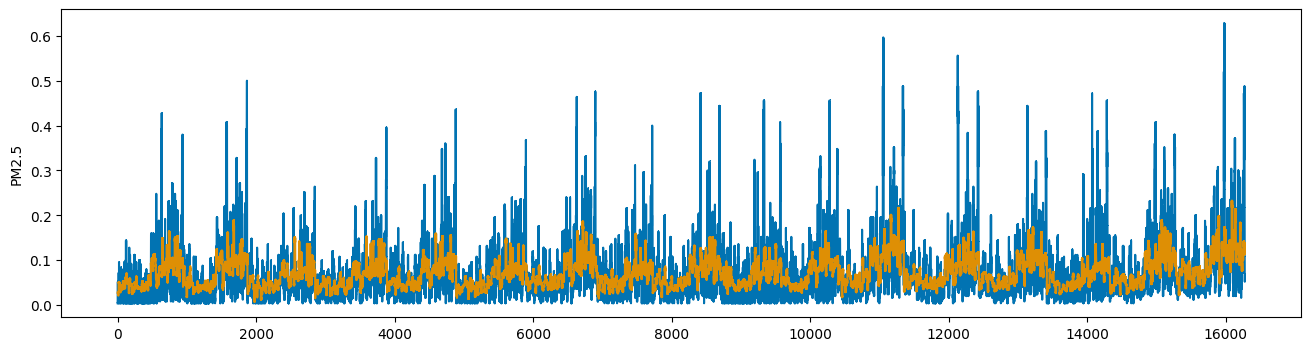

In [13]:
start = time.time()

for model in [xgb]:
    print(model)
    model.fit(x_train, y_train, 
              eval_set=[(x_train, y_train), (x_valid, y_valid)], eval_metric='mae',
              early_stopping_rounds=300, verbose=False)
    pred = model.predict(x_valid)
    pred = pd.Series(pred)
    pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
    ## 주황색이 실제, 초록색이 예측값입니다.
    plot_series(y_valid, pd.Series(pred), markers=[',' , ','])
    print('SMAPE : {}'.format(SMAPE(y_valid, pred)))
    print('MAE : {}'.format(mean_absolute_error(y_valid, pred)))
    print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_valid, pred))))

end = time.time()
print(f"{end - start:.5f} sec")

In [14]:
# test set
# https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent
test['cos_time'] = np.cos(2*np.pi*(test['hour']/24))
test['sin_time'] = np.sin(2*np.pi*(test['hour']/24))

# 계절 -> 추후 세분화 가능 -> 11가지
test.loc[(test['month']>=12) | (test['month']<=2),'season'] = 'winter' # 1,2,12
test.loc[(test['month']>=3) & (test['month']<=5),'season'] = 'spring' # 3,4,5
test.loc[(test['month']>=6) & (test['month']<=8),'season'] = 'summer' # 6,7,8
test.loc[(test['month']>=9) & (test['month']<=11),'season'] = 'autumn' # 9,10,11

test.drop('timestamp', axis=1, inplace=True)

categorical_col = ['측정소','season']
numeric_col = list(set(test.columns)-set(categorical_col))
print(numeric_col)

# one hot encoding
ohe_base_df = pd.DataFrame()
for col in categorical_col:
    ohe = OneHotEncoder(sparse=False)
    temp = ohe.fit_transform(test[col].values.reshape(-1,1))
    ohe_base_df = pd.concat([ohe_base_df,pd.DataFrame(temp, columns=col+'_'+ohe.categories_[0])],axis=1)
display(ohe_base_df)

# data(numeric) + data(encoding) + data_y
test = pd.concat([test[numeric_col],ohe_base_df], axis=1)
display(test.isnull().sum().sum())

['mean_풍속_hist2', 'std_풍속_hist1', 'std_강수량_hist1', 'range_습도_hist2', 'mean_습도_hist0', 'range_풍향_hist3', 'min_기온_hist0', 'range_기온_hist1', 'min_풍향_hist0', 'mean_기온_hist2', 'max_기온_hist0', '강수량_hist2', 'min_기온_hist2', 'range_강수량_hist3', 'range_기온_hist0', 'max_기온_hist1', 'month', 'max_풍향_hist0', 'std_기온_hist3', 'std_풍향_hist3', 'mean_강수량_hist2', 'min_습도_hist3', 'mean_풍속_hist3', 'cos_time', 'min_기온_hist3', 'range_습도_hist0', '풍속_hist1', 'PM2.5_hist1', 'max_풍향_hist1', 'max_풍향_hist2', 'min_강수량_hist3', 'min_강수량_hist2', '풍향_hist3', 'mean_풍속_hist0', 'range_강수량_hist2', 'max_강수량_hist2', 'range_풍속_hist0', 'min_풍속_hist0', 'mean_기온_hist1', 'max_풍속_hist3', 'mean_강수량_hist0', 'sin_time', '습도_hist2', '습도_hist1', 'min_기온_hist1', 'range_풍향_hist2', 'mean_강수량_hist1', '기온_hist2', '풍속_hist3', 'max_풍속_hist1', '기온_hist0', 'std_기온_hist1', 'mean_습도_hist1', 'std_기온_hist2', 'std_습도_hist1', 'std_풍향_hist2', 'std_습도_hist2', '강수량_hist3', '강수량_hist1', 'range_기온_hist3', 'max_강수량_hist0', 'hour', 'max_습도_hist0', 'std_풍속_hist

/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,측정소_공주,측정소_노은동,측정소_논산,측정소_대천2동,측정소_독곶리,측정소_동문동,측정소_모종동,측정소_문창동,측정소_성성동,측정소_신방동,...,측정소_아름동,측정소_예산군,측정소_읍내동,측정소_이원면,측정소_정림동,측정소_홍성읍,season_autumn,season_spring,season_summer,season_winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


78336

In [15]:
y_test = test.pop('PM2.5').copy()
x_test = test.copy()

In [16]:
pred = model.predict(x_test)

In [17]:
pred.shape

(78336,)

In [18]:
ans = pd.read_csv('answer_sample.csv')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/khj/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/tz/rtysx8vd52q9ysd2q9xblx6h0000gn/T/ipykernel_63339/605179391.py", line 1, in <module>
    ans = pd.read_csv('answer_sample.csv')
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    escapechar: str | None = None,
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/pandas/io/parsers/readers.py", line 577, in _read
    if kwds.get("parse_dates", None) is None:
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/python3.9/site-packages/pandas/io/parsers/readers.py", line 1407, in __init__
    self._engine_specified = kwds.get("engine_specified", engine_specified)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pollution/lib/py

In [19]:
ans['PM2.5'] = pd.Series(pred)

NameError: name 'ans' is not defined

In [164]:
# ans.to_csv('xgb1.csv')